In [70]:
import numpy as np
import pandas as pd 

df=pd.read_csv("heart.csv")

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
 df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("num of pepole without heart disease: "+ str(healthy))
print ("num of pepole with chance for heart disease: "+ str(sick))

num of pepole without heart disease: 138
num of pepole with chance for heart disease: 165


In [76]:
features = df.columns.tolist()
features.remove('target')
print(features)
X = df[features]
y = df["target"]

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [77]:
X = df[features]
y = df["target"]

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas

def func(X,y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=123)
    print(X_train)
    print(X_test)
    print(y_train)
    print(y_test)
    rg = RandomForestRegressor(criterion='mae')
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_test)
    #print(y_pred)
    #print(y_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2score=metrics.r2_score(y_test, y_pred)
    return ([mae, mse,r2score])

In [85]:
results={}
results['heart_mae'] = []
results['heart_mae'].append(func(X, y))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   45    0   0       138   236    0        0      152      1      0.2   
155   58    0   0       130   197    0        1      131      0      0.6   
251   43    1   0       132   247    1        0      143      1      0.1   
171   48    1   1       110   229    0        1      168      0      1.0   
53    44    0   2       108   141    0        1      175      0      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   69    1   3       160   234    1        0      131      0      0.1   
83    52    1   3       152   298    1        1      178      0      1.2   
17    66    0   3       150   226    0        1      114      0      2.6   
230   47    1   2       108   243    0        1      152      0      0.0   
98    43    1   2       130   315    0        1      162      0      1.9   

     slope  ca  thal  
107      1   0     2  
155      1   0     2  
251      1   4    

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [86]:
results

{'heart_mae': [[0.32870967741935475, 0.17651935483870965, 0.2559864035087722]]}

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [92]:
from sklearn.ensemble import RandomForestRegressor
def crit_mae(X_train, X_test, y_train, y_test):
    rg = RandomForestRegressor(criterion='mae')  
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_test)
    from sklearn import metrics
    mae= metrics.mean_absolute_error(y_test, y_pred)
    print(mae)
    mse= metrics.mean_squared_error(y_test, y_pred)
    r2_score=metrics.r2_score(y_test, y_pred)
    print(r2_score)
    return ([mae,mse,r2_score])

In [101]:
from sklearn.ensemble import RandomForestRegressor
def crit_mse(X_train, X_test, y_train, y_test):
    rg = RandomForestRegressor(criterion='mse')  
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_test)
    from sklearn import metrics
    mae= metrics.mean_absolute_error(y_test, y_pred)
    print(mae)
    mse= metrics.mean_squared_error(y_test, y_pred)
    r2_score=metrics.r2_score(y_test, y_pred)
    print(r2_score)
    return ([mae,mse,r2_score])

In [87]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=123)


In [134]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [89]:
y_train

107    1
155    1
251    0
171    0
53     1
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64

In [90]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [91]:
y_test

11     1
292    0
269    0
268    0
94     1
201    0
81     1
20     1
54     1
196    0
202    0
31     1
250    0
256    0
245    0
204    0
120    1
281    0
199    0
89     1
159    1
247    0
115    1
52     1
203    0
241    0
167    0
296    0
223    0
150    1
165    0
Name: target, dtype: int64

In [98]:
results_split={}
results_split['heart_mae'] = []
results_split['heart_mae'].append(crit_mae(X_train, X_test, y_train, y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3258064516129032
0.25483070175438627


In [102]:
results_split['heart_mse'] = []
results_split['heart_mse'].append(crit_mse(X_train, X_test, y_train, y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3058064516129032
0.23185263157894753


In [103]:
results_split

{'heart_mae': [[0.3258064516129032, 0.17679354838709677, 0.25483070175438627]],
 'heart_mse': [[0.3058064516129032, 0.1822451612903226, 0.23185263157894753]]}

In [104]:
Y_train10,Y_train90=train_test_split(y_train, train_size = 0.10,random_state=123,shuffle=False)

In [105]:
Y_train10

107    1
155    1
251    0
171    0
53     1
41     1
29     1
142    1
75     1
72     1
270    0
266    0
30     1
19     1
229    0
191    0
216    0
90     1
22     1
184    0
284    0
80     1
71     1
299    0
35     1
95     1
26     1
Name: target, dtype: int64

In [106]:
Y_train90

259    0
143    1
42     1
102    1
261    0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 245, dtype: int64

In [107]:
#no. of label as 0 before mislabelling
(Y_train10 == 0).sum()

10

In [108]:
#no. of label as 1 before mislabelling
(Y_train10 == 1).sum()

17

In [109]:
#changing labels
Y_train10=Y_train10.eq(0).mul(1)

In [110]:
Y_train10

107    0
155    0
251    1
171    1
53     0
41     0
29     0
142    0
75     0
72     0
270    1
266    1
30     0
19     0
229    1
191    1
216    1
90     0
22     0
184    1
284    1
80     0
71     0
299    1
35     0
95     0
26     0
Name: target, dtype: int64

In [111]:
#no. of label as 0 after mislabelling
(Y_train10 == 0).sum()

17

In [112]:
#no. of label as 1 after mislabelling
(Y_train10 == 1).sum()

10

In [113]:
y_train_10mislabel = pd.concat([Y_train10, Y_train90])

In [114]:
y_train_10mislabel

107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64

In [254]:
y_new10=pd.concat([y_train_10mislabel, y_test])
x_new10=pd.concat([X_train, X_test])
df10=pd.concat([x_new10, y_new10],axis=1, join='inner')
df10.to_csv('mislabel10.csv', index=True)

In [31]:
###############Mislabelling 15% of data##########################

In [115]:
Y_train15,Y_train85=train_test_split(y_train, train_size = 0.15,random_state=123,shuffle=False)

In [116]:
print(Y_train15)
print(Y_train85)

107    1
155    1
251    0
171    0
53     1
41     1
29     1
142    1
75     1
72     1
270    0
266    0
30     1
19     1
229    0
191    0
216    0
90     1
22     1
184    0
284    0
80     1
71     1
299    0
35     1
95     1
26     1
259    0
143    1
42     1
102    1
261    0
228    0
288    0
78     1
124    1
200    0
197    0
24     1
174    0
Name: target, dtype: int64
175    0
105    1
220    0
61     1
179    0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 232, dtype: int64


In [117]:
#no. of label as 0 before mislabelling
print((Y_train15 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train15 == 1).sum())

17
23


In [118]:
#changing labels
Y_train15=Y_train15.eq(0).mul(1)
#no. of label as 0 before mislabelling
print((Y_train15 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train15 == 1).sum())

23
17


In [119]:
Y_train15

107    0
155    0
251    1
171    1
53     0
41     0
29     0
142    0
75     0
72     0
270    1
266    1
30     0
19     0
229    1
191    1
216    1
90     0
22     0
184    1
284    1
80     0
71     0
299    1
35     0
95     0
26     0
259    1
143    0
42     0
102    0
261    1
228    1
288    1
78     0
124    0
200    1
197    1
24     0
174    1
Name: target, dtype: int64

In [120]:
y_train_15mislabel = pd.concat([Y_train15, Y_train85])

In [121]:
print(y_train_15mislabel)

107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [255]:
y_new15=pd.concat([y_train_15mislabel, y_test])
x_new15=pd.concat([X_train, X_test])
df15=pd.concat([x_new15, y_new15],axis=1, join='inner')
df15.to_csv('mislabel15.csv', index=True)

In [122]:
###############Mislabelling 20% of data##########################

In [123]:
Y_train20,Y_train80=train_test_split(y_train, train_size = 0.20,random_state=123,shuffle=False)

In [124]:
#no. of label as 0 before mislabelling
print((Y_train20 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train20 == 1).sum())

#changing labels
Y_train20=Y_train20.eq(0).mul(1)
#no. of label as 0 before mislabelling
print((Y_train20 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train20 == 1).sum())

y_train_20mislabel = pd.concat([Y_train20, Y_train80])

print(y_train_20mislabel)

22
32
32
22
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [256]:
y_new20=pd.concat([y_train_20mislabel, y_test])
x_new20=pd.concat([X_train, X_test])
df20=pd.concat([x_new20, y_new20],axis=1, join='inner')
df20.to_csv('mislabel20.csv', index=True)

In [125]:
###############Mislabelling 25% of data##########################

In [126]:
Y_train25,Y_train75=train_test_split(y_train, train_size = 0.25,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train25 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train25 == 1).sum())

#changing labels
Y_train25=Y_train25.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train25 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train25 == 1).sum())

y_train_25mislabel = pd.concat([Y_train25, Y_train75])

print(y_train_25mislabel)

31
37
37
31
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [257]:
y_new25=pd.concat([y_train_25mislabel, y_test])
x_new25=pd.concat([X_train, X_test])
df25=pd.concat([x_new25, y_new25],axis=1, join='inner')
df25.to_csv('mislabel25.csv', index=True)

In [82]:
###############Mislabelling 30% of data##########################

In [127]:
Y_train30,Y_train70=train_test_split(y_train, train_size = 0.30,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train30 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train30 == 1).sum())

#changing labels
Y_train30=Y_train30.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train30 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train30 == 1).sum())

y_train_30mislabel = pd.concat([Y_train30, Y_train70])

print(y_train_30mislabel)

36
45
45
36
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [258]:
y_new30=pd.concat([y_train_30mislabel, y_test])
x_new30=pd.concat([X_train, X_test])
df30=pd.concat([x_new30, y_new30],axis=1, join='inner')
df30.to_csv('mislabel30.csv', index=True)

In [84]:
###############Mislabelling 40% of data##########################

In [128]:
Y_train40,Y_train60=train_test_split(y_train, train_size = 0.40,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train40 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train40 == 1).sum())

#changing labels
Y_train40=Y_train40.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train40 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train40 == 1).sum())

y_train_40mislabel = pd.concat([Y_train40, Y_train60])

print(y_train_40mislabel)

45
63
63
45
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [259]:
y_new40=pd.concat([y_train_40mislabel, y_test])
x_new40=pd.concat([X_train, X_test])
df40=pd.concat([x_new40, y_new40],axis=1, join='inner')
df40.to_csv('mislabel40.csv', index=True)

In [129]:
#########################Gaussian Noise################################

In [185]:
####Gaussian Noise Level 1 mu=0  sigma=0.1 ####
np.random.seed(42)
noise = np.random.normal(0, .1, X_train.shape)
print(noise)
X_train_gaus1 = X_train + noise
print(X_train_gaus1)

[[ 0.04967142 -0.01382643  0.06476885 ... -0.04634177 -0.04657298
   0.02419623]
 [-0.19132802 -0.17249178 -0.05622875 ... -0.14247482 -0.05443827
   0.01109226]
 [-0.11509936  0.0375698  -0.06006387 ...  0.02088636 -0.19596701
  -0.1328186 ]
 ...
 [-0.00480885 -0.01831505 -0.03566731 ... -0.0061004   0.05002405
  -0.05336003]
 [ 0.12208213 -0.08767738  0.17120403 ...  0.05027448 -0.24932708
  -0.09656648]
 [ 0.16291664 -0.0581782  -0.117388   ... -0.12390527  0.20958435
   0.15944424]]
           age       sex        cp    trestbps        chol       fbs  \
107  45.049671 -0.013826  0.064769  138.152303  235.976585 -0.023414   
155  57.808672 -0.172492 -0.056229  129.898717  197.031425 -0.090802   
251  42.884901  1.037570 -0.060064  131.970831  246.939829  1.185228   
171  48.019686  1.073847  1.017137  109.988435  228.969890 -0.147852   
53   43.932308  0.061168  2.103100  108.093128  140.916078 -0.030921   
..         ...       ...       ...         ...         ...       ...   
106 

In [260]:
X_train_gaus1.to_csv('X_train_gaus1.csv', index=True)

In [186]:
####Gaussian Noise Level 2 mu=0  sigma=1 ####
np.random.seed(42)
noise = np.random.normal(0, 1, X_train.shape)
print(noise)
X_train_gaus2 = X_train + noise
print(X_train_gaus2)

[[ 0.49671415 -0.1382643   0.64768854 ... -0.46341769 -0.46572975
   0.24196227]
 [-1.91328024 -1.72491783 -0.56228753 ... -1.42474819 -0.54438272
   0.11092259]
 [-1.15099358  0.37569802 -0.60063869 ...  0.2088636  -1.95967012
  -1.32818605]
 ...
 [-0.04808851 -0.18315047 -0.35667313 ... -0.06100397  0.50024047
  -0.53360031]
 [ 1.2208213  -0.87677378  1.71204028 ...  0.50274481 -2.49327082
  -0.9656648 ]
 [ 1.62916636 -0.58178203 -1.17387996 ... -1.2390527   2.0958435
   1.59444239]]
           age       sex        cp    trestbps        chol       fbs  \
107  45.496714 -0.138264  0.647689  139.523030  235.765847 -0.234137   
155  56.086720 -1.724918 -0.562288  128.987169  197.314247 -0.908024   
251  41.849006  1.375698 -0.600639  131.708306  246.398293  2.852278   
171  48.196861  1.738467  1.171368  109.884352  228.698896 -1.478522   
53   43.323078  0.611676  3.031000  108.931280  140.160782 -0.309212   
..         ...       ...       ...         ...         ...       ...   
106  

In [261]:
X_train_gaus2.to_csv('X_train_gaus2.csv', index=True)

In [187]:
####Gaussian Noise Level 3 mu=0  sigma=5 ####
np.random.seed(42)
noise = np.random.normal(0, 5, X_train.shape)
X_train_gaus3 = X_train + noise
print(X_train_gaus3)

           age       sex         cp    trestbps        chol        fbs  \
107  47.483571 -0.691322   3.238443  145.615149  234.829233  -1.170685   
155  48.433599 -8.624589  -2.811438  124.935844  198.571237  -4.540120   
251  37.245032  2.878490  -3.003193  130.541531  243.991467  10.261391   
171  48.984306  4.692333   1.856841  109.421759  227.494482  -7.392610   
53   40.615390  3.058381   7.154998  112.656401  136.803912  -1.546062   
..         ...       ...        ...         ...         ...        ...   
106  68.595608  1.261292  -2.303025  156.414919  227.577079   5.889078   
83   46.947009 -1.576092  10.650976  155.324636  293.377179  -6.987996   
17   65.759557 -0.915752   1.216634  155.903205  222.863433   0.226114   
230  53.104106 -3.383869  10.560201   99.261817  245.173850   2.377153   
98   51.145832 -1.908910  -3.869400  129.010311  325.339532  -9.158411   

       restecg     thalach     exang    oldpeak      slope         ca  \
107   7.896064  155.837174 -1.347372  

In [262]:
X_train_gaus3.to_csv('X_train_gaus3.csv', index=True)

In [193]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results={}
results['gauslevel1_without_mislabel_mae'] = []
results['gauslevel1_without_mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train,y_test))


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3535483870967742
0.15916578947368454


In [194]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_10%mislabel_mae'] = []
results['gauslevel1_with_10%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_10mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3351612903225807
0.28217324561403534


In [195]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_15%mislabel_mae'] = []
results['gauslevel1_with_15%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_15mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3367741935483871
0.30182017543859685


In [196]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_20%mislabel_mae'] = []
results['gauslevel1_with_20%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_20mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.35516129032258065
0.23697850877193005


In [197]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_25%mislabel_mae'] = []
results['gauslevel1_with_25%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_25mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.42806451612903224
0.06645131578947394


In [198]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_30%mislabel_mae'] = []
results['gauslevel1_with_30%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_30mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4383870967741936
0.07072061403508834


In [199]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level1
results['gauslevel1_with_40%mislabel_mae'] = []
results['gauslevel1_with_40%mislabel_mae'].append(crit_mae(X_train_gaus1,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.49774193548387097
-0.160256578947368


In [200]:
results

{'gauslevel1_without_mislabel_mae': [[0.3535483870967742,
   0.19949032258064514,
   0.15916578947368454]],
 'gauslevel1_with_10%mislabel_mae': [[0.3351612903225807,
   0.17030645161290323,
   0.28217324561403534]],
 'gauslevel1_with_15%mislabel_mae': [[0.3367741935483871,
   0.16564516129032256,
   0.30182017543859685]],
 'gauslevel1_with_20%mislabel_mae': [[0.35516129032258065,
   0.18102903225806452,
   0.23697850877193005]],
 'gauslevel1_with_25%mislabel_mae': [[0.42806451612903224,
   0.22148709677419356,
   0.06645131578947394]],
 'gauslevel1_with_30%mislabel_mae': [[0.4383870967741936,
   0.22047419354838704,
   0.07072061403508834]],
 'gauslevel1_with_40%mislabel_mae': [[0.49774193548387097,
   0.2752741935483871,
   -0.160256578947368]]}

In [201]:
##Calling regression function where criterion=mse with mislabelling for Gaussian noise level1 
results['gauslevel1_without_mislabel_mse'] =[]
results['gauslevel1_with_10%mislabel_mse'] = []
results['gauslevel1_with_15%mislabel_mse'] = []
results['gauslevel1_with_20%mislabel_mse'] = []
results['gauslevel1_with_25%mislabel_mse'] = []
results['gauslevel1_with_30%mislabel_mse'] = []
results['gauslevel1_with_40%mislabel_mse'] = []
results['gauslevel1_without_mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train,y_test))
results['gauslevel1_with_10%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_10mislabel,y_test))
results['gauslevel1_with_15%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_15mislabel,y_test))
results['gauslevel1_with_20%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_20mislabel,y_test))
results['gauslevel1_with_25%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_25mislabel,y_test))
results['gauslevel1_with_30%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_30mislabel,y_test))
results['gauslevel1_with_40%mislabel_mse'].append(crit_mse(X_train_gaus1,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3125806451612903
0.1842785087719302


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.29161290322580646
0.2813438596491231


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.30387096774193556
0.3205289473684212


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3464516129032257
0.2547763157894738


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4206451612903226
0.12218333333333342


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.425483870967742
0.10574517543859674


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.46741935483870967
0.007632894736842255


In [202]:
results

{'gauslevel1_without_mislabel_mae': [[0.3535483870967742,
   0.19949032258064514,
   0.15916578947368454]],
 'gauslevel1_with_10%mislabel_mae': [[0.3351612903225807,
   0.17030645161290323,
   0.28217324561403534]],
 'gauslevel1_with_15%mislabel_mae': [[0.3367741935483871,
   0.16564516129032256,
   0.30182017543859685]],
 'gauslevel1_with_20%mislabel_mae': [[0.35516129032258065,
   0.18102903225806452,
   0.23697850877193005]],
 'gauslevel1_with_25%mislabel_mae': [[0.42806451612903224,
   0.22148709677419356,
   0.06645131578947394]],
 'gauslevel1_with_30%mislabel_mae': [[0.4383870967741936,
   0.22047419354838704,
   0.07072061403508834]],
 'gauslevel1_with_40%mislabel_mae': [[0.49774193548387097,
   0.2752741935483871,
   -0.160256578947368]],
 'gauslevel1_without_mislabel_mse': [[0.3125806451612903,
   0.1935322580645161,
   0.1842785087719302]],
 'gauslevel1_with_10%mislabel_mse': [[0.29161290322580646,
   0.1705032258064516,
   0.2813438596491231]],
 'gauslevel1_with_15%mislabel_

In [204]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level3
results['gauslevel2_without_mislabel_mae'] =[]
results['gauslevel2_with_10%mislabel_mae'] = []
results['gauslevel2_with_15%mislabel_mae'] = []
results['gauslevel2_with_20%mislabel_mae'] = []
results['gauslevel2_with_25%mislabel_mae'] = []
results['gauslevel2_with_30%mislabel_mae'] = []
results['gauslevel2_with_40%mislabel_mae'] = []
results['gauslevel2_without_mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train,y_test))
results['gauslevel2_with_10%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_10mislabel,y_test))
results['gauslevel2_with_15%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_15mislabel,y_test))
results['gauslevel2_with_20%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_20mislabel,y_test))
results['gauslevel2_with_25%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_25mislabel,y_test))
results['gauslevel2_with_30%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_30mislabel,y_test))
results['gauslevel2_with_40%mislabel_mae'].append(crit_mae(X_train_gaus2,X_test,y_train_40mislabel,y_test))



/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3687096774193549
0.05745043859649157


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.35612903225806447
0.1956043859649127


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3732258064516129
0.16807149122807064


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.39290322580645154
0.13542631578947395


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4490322580645161
-0.014842105263157546


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.47870967741935483
-0.08377631578947331


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5225806451612903
-0.23951052631578906


In [205]:
##Calling regression function where criterion=mse with mislabelling for Gaussian noise level2
results['gauslevel2_without_mislabel_mse'] =[]
results['gauslevel2_with_10%mislabel_mse'] = []
results['gauslevel2_with_15%mislabel_mse'] = []
results['gauslevel2_with_20%mislabel_mse'] = []
results['gauslevel2_with_25%mislabel_mse'] = []
results['gauslevel2_with_30%mislabel_mse'] = []
results['gauslevel2_with_40%mislabel_mse'] = []
results['gauslevel2_without_mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train,y_test))
results['gauslevel2_with_10%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_10mislabel,y_test))
results['gauslevel2_with_15%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_15mislabel,y_test))
results['gauslevel2_with_20%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_20mislabel,y_test))
results['gauslevel2_with_25%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_25mislabel,y_test))
results['gauslevel2_with_30%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_30mislabel,y_test))
results['gauslevel2_with_40%mislabel_mse'].append(crit_mse(X_train_gaus2,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3535483870967742
0.06526842105263164


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3351612903225807
0.22044517543859687


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.34548387096774197
0.2280048245614037


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.39645161290322584
0.11847149122807044


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.42419354838709666
0.11085745614035114


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4612903225806452
-0.008234210526315566


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.49354838709677423
-0.09245087719298195


In [206]:
##Calling regression function where criterion=mae with mislabelling for Gaussian noise level3
results['gauslevel3_without_mislabel_mae'] =[]
results['gauslevel3_with_10%mislabel_mae'] = []
results['gauslevel3_with_15%mislabel_mae'] = []
results['gauslevel3_with_20%mislabel_mae'] = []
results['gauslevel3_with_25%mislabel_mae'] = []
results['gauslevel3_with_30%mislabel_mae'] = []
results['gauslevel3_with_40%mislabel_mae'] = []
results['gauslevel3_without_mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train,y_test))
results['gauslevel3_with_10%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_10mislabel,y_test))
results['gauslevel3_with_15%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_15mislabel,y_test))
results['gauslevel3_with_20%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_20mislabel,y_test))
results['gauslevel3_with_25%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_25mislabel,y_test))
results['gauslevel3_with_30%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_30mislabel,y_test))
results['gauslevel3_with_40%mislabel_mae'].append(crit_mae(X_train_gaus3,X_test,y_train_40mislabel,y_test))


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4403225806451612
-0.2660100877192977


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.44709677419354843
-0.09680175438596494


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.46741935483870967
-0.18307149122806976


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.46064516129032257
-0.06593771929824555


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5125806451612903
-0.3144951754385963


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.49354838709677434
-0.17984912280701715


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.53
-0.25516008771929766


In [207]:
##Calling regression function where criterion=mse with mislabelling for Gaussian noise level3
results['gauslevel3_without_mislabel_mse'] =[]
results['gauslevel3_with_10%mislabel_mse'] = []
results['gauslevel3_with_15%mislabel_mse'] = []
results['gauslevel3_with_20%mislabel_mse'] = []
results['gauslevel3_with_25%mislabel_mse'] = []
results['gauslevel3_with_30%mislabel_mse'] = []
results['gauslevel3_with_40%mislabel_mse'] = []
results['gauslevel3_without_mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train,y_test))
results['gauslevel3_with_10%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_10mislabel,y_test))
results['gauslevel3_with_15%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_15mislabel,y_test))
results['gauslevel3_with_20%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_20mislabel,y_test))
results['gauslevel3_with_25%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_25mislabel,y_test))
results['gauslevel3_with_30%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_30mislabel,y_test))
results['gauslevel3_with_40%mislabel_mse'].append(crit_mse(X_train_gaus3,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4074193548387097
-0.15990307017543803


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.44290322580645153
0.021827631578947626


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4712903225806451
-0.14432149122806992


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.45806451612903226
-0.030287719298245364


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.502258064516129
-0.20950307017543857


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.49903225806451607
-0.1485092105263155


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5148387096774193
-0.14787017543859626


In [208]:
results

{'gauslevel1_without_mislabel_mae': [[0.3535483870967742,
   0.19949032258064514,
   0.15916578947368454]],
 'gauslevel1_with_10%mislabel_mae': [[0.3351612903225807,
   0.17030645161290323,
   0.28217324561403534]],
 'gauslevel1_with_15%mislabel_mae': [[0.3367741935483871,
   0.16564516129032256,
   0.30182017543859685]],
 'gauslevel1_with_20%mislabel_mae': [[0.35516129032258065,
   0.18102903225806452,
   0.23697850877193005]],
 'gauslevel1_with_25%mislabel_mae': [[0.42806451612903224,
   0.22148709677419356,
   0.06645131578947394]],
 'gauslevel1_with_30%mislabel_mae': [[0.4383870967741936,
   0.22047419354838704,
   0.07072061403508834]],
 'gauslevel1_with_40%mislabel_mae': [[0.49774193548387097,
   0.2752741935483871,
   -0.160256578947368]],
 'gauslevel1_without_mislabel_mse': [[0.3125806451612903,
   0.1935322580645161,
   0.1842785087719302]],
 'gauslevel1_with_10%mislabel_mse': [[0.29161290322580646,
   0.1705032258064516,
   0.2813438596491231]],
 'gauslevel1_with_15%mislabel_

In [73]:
#########################Poisson Noise################################

In [211]:
#lambda=1
np.random.seed(42)
noise = np.random.poisson(1, X_train.shape)
print(noise)
new_X_train_poisson_1 = X_train + noise
print(new_X_train_poisson_1)

[[1 2 0 ... 0 1 0]
 [0 1 0 ... 0 1 1]
 [1 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 2 0 1]
 [2 2 3 ... 2 2 0]
 [0 1 1 ... 0 1 0]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   46    2   0       138   239    2        0      152      1      1.2   
155   58    1   0       131   197    1        1      134      0      1.6   
251   44    2   0       137   247    1        0      143      2      1.1   
171   50    1   4       110   229    0        3      168      0      1.0   
53    46    1   2       108   142    2        2      175      0      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   70    2   5       160   235    3        0      132      1      0.1   
83    53    3   5       152   298    2        1      178      1      1.2   
17    66    0   3       151   227    1        1      115      0      3.6   
230   49    3   5       110   243    1        2      153      1      1.0   
98    43    2   3       130   316    1      

In [217]:
#lambda=4
np.random.seed(42)
noise = np.random.poisson(4, X_train.shape)
print(noise)
new_X_train_poisson_4 = X_train + noise
print(new_X_train_poisson_4)

[[5 4 4 ... 7 1 4]
 [3 3 0 ... 6 6 4]
 [3 5 5 ... 3 4 4]
 ...
 [2 1 6 ... 6 3 5]
 [6 1 6 ... 3 1 5]
 [2 6 2 ... 1 5 4]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   50    4   4       142   238    5        2      157      4      5.2   
155   61    3   0       135   201    6        8      132      5      2.6   
251   46    6   5       134   248    4        6      147      3      2.1   
171   52   10   2       112   231    4        7      171      7      5.0   
53    51    7   9       110   144    2        4      177      7      2.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   70    8   5       162   237    4        4      133      6      3.1   
83    59    3   6       158   300    9        5      182      3      5.2   
17    68    1   9       155   227    5        5      115      2      8.6   
230   53    2   8       113   251    7        6      155      1      6.0   
98    45    7   4       134   317    3      

In [218]:
#lambda=10
np.random.seed(42)
noise = np.random.poisson(10, X_train.shape)
print(noise)
new_X_train_poisson_10 = X_train + noise
print(new_X_train_poisson_10)

[[12  6 11 ...  7 11 11]
 [ 8 12  6 ...  8  6 13]
 [12 13  9 ... 10  8 15]
 ...
 [15 14 12 ... 14  5 10]
 [ 9  9 10 ...  7 13  7]
 [13  9 12 ... 12 11  9]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   57    6  11       152   243    8        9      163      9     10.2   
155   66   12   6       137   205   10        6      134      9     13.6   
251   55   14   9       146   255    9       12      158     14     13.1   
171   57    8   9       123   244    8        8      177      6     17.0   
53    52   11   5       123   147    7       10      186      8     12.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   79   14  15       170   243   19       12      140      9     10.1   
83    64   16  16       166   306    9        9      185     11     10.2   
17    81   14  15       167   237   16       11      127      4     12.6   
230   56   10  12       124   255   10        9      164     10      7.0   
98    56

In [263]:
new_X_train_poisson_1.to_csv('new_X_train_poisson_1.csv', index=True)
new_X_train_poisson_4.to_csv('new_X_train_poisson_4.csv', index=True)
new_X_train_poisson_10.to_csv('new_X_train_poisson_10.csv', index=True)

In [219]:
##Calling regression function where criterion=mae with mislabelling for Poisson noise where lambda=1
poisson_results={}
poisson_results['poissonlevel1_without_mislabel_mae'] =[]
poisson_results['poissonlevel1_with_10%mislabel_mae'] = []
poisson_results['poissonlevel1_with_15%mislabel_mae'] = []
poisson_results['poissonlevel1_with_20%mislabel_mae'] = []
poisson_results['poissonlevel1_with_25%mislabel_mae'] = []
poisson_results['poissonlevel1_with_30%mislabel_mae'] = []
poisson_results['poissonlevel1_with_40%mislabel_mae'] = []
poisson_results['poissonlevel1_without_mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train,y_test))
poisson_results['poissonlevel1_with_10%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_10mislabel,y_test))
poisson_results['poissonlevel1_with_15%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_15mislabel,y_test))
poisson_results['poissonlevel1_with_20%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_20mislabel,y_test))
poisson_results['poissonlevel1_with_25%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_25mislabel,y_test))
poisson_results['poissonlevel1_with_30%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_30mislabel,y_test))
poisson_results['poissonlevel1_with_40%mislabel_mae'].append(crit_mae(new_X_train_poisson_1,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.40354838709677415
0.13051798245614066


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4019354838709677
0.13673157894736865


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.42967741935483866
0.025512280701754597


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4209677419354839
0.10139429824561419


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4641935483870968
-0.02187149122806975


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.45290322580645165
0.031304385964912695


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4690322580645162
-0.01579385964912272


In [221]:
##Calling regression function where criterion=mse with mislabelling for Poisson noise where lambda=1
poisson_results['poissonlevel1_without_mislabel_mse'] =[]
poisson_results['poissonlevel1_with_10%mislabel_mse'] = []
poisson_results['poissonlevel1_with_15%mislabel_mse'] = []
poisson_results['poissonlevel1_with_20%mislabel_mse'] = []
poisson_results['poissonlevel1_with_25%mislabel_mse'] = []
poisson_results['poissonlevel1_with_30%mislabel_mse'] = []
poisson_results['poissonlevel1_with_40%mislabel_mse'] = []
poisson_results['poissonlevel1_without_mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train,y_test))
poisson_results['poissonlevel1_with_10%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_10mislabel,y_test))
poisson_results['poissonlevel1_with_15%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_15mislabel,y_test))
poisson_results['poissonlevel1_with_20%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_20mislabel,y_test))
poisson_results['poissonlevel1_with_25%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_25mislabel,y_test))
poisson_results['poissonlevel1_with_30%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_30mislabel,y_test))
poisson_results['poissonlevel1_with_40%mislabel_mse'].append(crit_mse(new_X_train_poisson_1,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.36612903225806454
0.11134692982456185


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.3864516129032258
0.12264561403508789


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.39903225806451614
0.0562811403508775


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4209677419354839
0.0761320175438599


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4832258064516129
-0.10338245614035046


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.48129032258064514
-0.06664473684210503


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.47677419354838707
-0.05312982456140314


In [222]:
poisson_results

{'poissonlevel1_without_mislabel_mse': [[0.36612903225806454,
   0.2108354838709677,
   0.11134692982456185]],
 'poissonlevel1_with_10%mislabel_mse': [[0.3864516129032258,
   0.20815483870967744,
   0.12264561403508789]],
 'poissonlevel1_with_15%mislabel_mse': [[0.39903225806451614,
   0.22390000000000002,
   0.0562811403508775]],
 'poissonlevel1_with_20%mislabel_mse': [[0.4209677419354839,
   0.21919032258064516,
   0.0761320175438599]],
 'poissonlevel1_with_25%mislabel_mse': [[0.4832258064516129,
   0.2617806451612903,
   -0.10338245614035046]],
 'poissonlevel1_with_30%mislabel_mse': [[0.48129032258064514,
   0.2530645161290323,
   -0.06664473684210503]],
 'poissonlevel1_with_40%mislabel_mse': [[0.47677419354838707,
   0.24985806451612905,
   -0.05312982456140314]]}

In [223]:
##Calling regression function where criterion=mae with mislabelling for Poisson noise where lambda=10
poisson_results_l2={}
poisson_results_l2['poissonlevel2_without_mislabel_mae'] =[]
poisson_results_l2['poissonlevel2_with_10%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_with_15%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_with_20%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_with_25%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_with_30%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_with_40%mislabel_mae'] = []
poisson_results_l2['poissonlevel2_without_mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train,y_test))
poisson_results_l2['poissonlevel2_with_10%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_10mislabel,y_test))
poisson_results_l2['poissonlevel2_with_15%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_15mislabel,y_test))
poisson_results_l2['poissonlevel2_with_20%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_20mislabel,y_test))
poisson_results_l2['poissonlevel2_with_25%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_25mislabel,y_test))
poisson_results_l2['poissonlevel2_with_30%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_30mislabel,y_test))
poisson_results_l2['poissonlevel2_with_40%mislabel_mae'].append(crit_mae(new_X_train_poisson_10,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5819354838709677
-0.6499070175438595


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5306451612903226
-0.2197004385964909


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4880645161290323
-0.07818815789473654


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.48806451612903223
-0.012136403508771654


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5080645161290323
-0.09934429824561386


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.51
-0.10162850877192975


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5074193548387097
-0.09115921052631548


In [225]:
##Calling regression function where criterion=mse with mislabelling for Poisson noise where lambda=10
poisson_results_l2['poissonlevel2_without_mislabel_mse'] =[]
poisson_results_l2['poissonlevel2_with_10%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_with_15%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_with_20%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_with_25%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_with_30%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_with_40%mislabel_mse'] = []
poisson_results_l2['poissonlevel2_without_mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train,y_test))
poisson_results_l2['poissonlevel2_with_10%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_10mislabel,y_test))
poisson_results_l2['poissonlevel2_with_15%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_15mislabel,y_test))
poisson_results_l2['poissonlevel2_with_20%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_20mislabel,y_test))
poisson_results_l2['poissonlevel2_with_25%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_25mislabel,y_test))
poisson_results_l2['poissonlevel2_with_30%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_30mislabel,y_test))
poisson_results_l2['poissonlevel2_with_40%mislabel_mse'].append(crit_mse(new_X_train_poisson_10,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5280645161290322
-0.2716118421052627


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5109677419354839
-0.12043245614035025


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5116129032258065
-0.12796491228070161


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5203225806451613
-0.15378464912280676


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.49580645161290327
-0.04068903508771915


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4851612903225806
-0.04663070175438566


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5061290322580645
-0.08743377192982438


In [226]:
poisson_results_l2

{'poissonlevel2_without_mislabel_mae': [[0.5819354838709677,
   0.39144516129032264,
   -0.6499070175438595]],
 'poissonlevel2_with_10%mislabel_mae': [[0.5306451612903226,
   0.28937741935483874,
   -0.2197004385964909]],
 'poissonlevel2_with_15%mislabel_mae': [[0.4880645161290323,
   0.25580322580645165,
   -0.07818815789473654]],
 'poissonlevel2_with_20%mislabel_mae': [[0.48806451612903223,
   0.24013225806451616,
   -0.012136403508771654]],
 'poissonlevel2_with_25%mislabel_mae': [[0.5080645161290323,
   0.26082258064516134,
   -0.09934429824561386]],
 'poissonlevel2_with_30%mislabel_mae': [[0.51,
   0.2613645161290323,
   -0.10162850877192975]],
 'poissonlevel2_with_40%mislabel_mae': [[0.5074193548387097,
   0.25888064516129033,
   -0.09115921052631548]],
 'poissonlevel2_without_mislabel_mse': [[0.5280645161290322,
   0.3016935483870967,
   -0.2716118421052627]],
 'poissonlevel2_with_10%mislabel_mse': [[0.5109677419354839,
   0.26582580645161286,
   -0.12043245614035025]],
 'poisson

In [ ]:
#########################Uniform Noise################################

In [227]:
np.random.seed(42)
noise = np.random.uniform(low=0.0, high=1.0, size=X_train.shape)
print(noise)
new_X_train_uniform = X_train + noise
print(new_X_train_uniform)

[[0.37454012 0.95071431 0.73199394 ... 0.02058449 0.96990985 0.83244264]
 [0.21233911 0.18182497 0.18340451 ... 0.36636184 0.45606998 0.78517596]
 [0.19967378 0.51423444 0.59241457 ... 0.30461377 0.09767211 0.68423303]
 ...
 [0.88609344 0.19665358 0.73742609 ... 0.46500952 0.84738793 0.06239407]
 [0.33527905 0.06701654 0.97534313 ... 0.22936578 0.46910721 0.26856217]
 [0.10097811 0.16749109 0.14727556 ... 0.29938337 0.23250599 0.12967898]]
           age       sex        cp    trestbps        chol       fbs  \
107  45.374540  0.950714  0.731994  138.598658  236.156019  0.155995   
155  58.212339  0.181825  0.183405  130.304242  197.524756  0.431945   
251  43.199674  1.514234  0.592415  132.046450  247.607545  1.170524   
171  48.440152  1.122038  1.495177  110.034389  229.909320  0.258780   
53   44.939499  0.894827  2.597900  108.921874  141.088493  0.195983   
..         ...       ...       ...         ...         ...       ...   
106  69.779103  1.609697  3.699640  160.838155  234.

In [264]:
new_X_train_uniform.to_csv('new_X_train_uniform.csv', index=True)

In [228]:
crit_mae(X_train,X_test,y_train,y_test)

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.3264516129032258
0.2618736842105265


[0.3264516129032258, 0.1751225806451613, 0.2618736842105265]

In [229]:
##Calling regression function where criterion=mae with mislabelling for Uniform noise 
print(crit_mae(new_X_train_uniform,X_test,y_train_10mislabel,y_test))
print(crit_mae(new_X_train_uniform,X_test,y_train_15mislabel,y_test))
print(crit_mae(new_X_train_uniform,X_test,y_train_20mislabel,y_test))
print(crit_mae(new_X_train_uniform,X_test,y_train_25mislabel,y_test))
print(crit_mae(new_X_train_uniform,X_test,y_train_30mislabel,y_test))
print(crit_mae(new_X_train_uniform,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.517741935483871
-0.18630745614035082
[0.517741935483871, 0.2814548387096775, -0.18630745614035082]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5748387096774193
-0.5266684210526311
[0.5748387096774193, 0.36220645161290327, -0.5266684210526311]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5635483870967741
-0.41206359649122826
[0.5635483870967741, 0.3350161290322582, -0.41206359649122826]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5464516129032259
-0.30333245614035054
[0.5464516129032259, 0.3092193548387097, -0.30333245614035054]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5351612903225806
-0.23878991228070134
[0.5351612903225806, 0.29390645161290324, -0.23878991228070134]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5467741935483871
-0.28156447368421
[0.5467741935483871, 0.30405483870967737, -0.28156447368421]


In [230]:
##Calling regression function where criterion=mse with mislabelling for Uniform noise 
print(crit_mse(new_X_train_uniform,X_test,y_train_10mislabel,y_test))
print(crit_mse(new_X_train_uniform,X_test,y_train_15mislabel,y_test))
print(crit_mse(new_X_train_uniform,X_test,y_train_20mislabel,y_test))
print(crit_mse(new_X_train_uniform,X_test,y_train_25mislabel,y_test))
print(crit_mse(new_X_train_uniform,X_test,y_train_30mislabel,y_test))
print(crit_mse(new_X_train_uniform,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4438709677419355
0.037531578947368804
[0.4438709677419355, 0.22834838709677416, 0.037531578947368804]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4929032258064517
-0.10346403508771918
[0.4929032258064517, 0.2618000000000001, -0.10346403508771918]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4887096774193548
-0.08389868421052604
[0.4887096774193548, 0.25715806451612905, -0.08389868421052604]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.48322580645161284
-0.05791578947368392
[0.48322580645161284, 0.25099354838709675, -0.05791578947368392]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.48129032258064525
-0.008098245614034827
[0.48129032258064525, 0.23917419354838712, -0.008098245614034827]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5145161290322581
-0.14361447368421065
[0.5145161290322581, 0.27132580645161297, -0.14361447368421065]


In [ ]:
#########################Spike Noise################################

In [231]:
X_train[X_train > 100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,NaN,NaN,NaN,138.0,236,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,130.0,197,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,132.0,247,NaN,NaN,143.0,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,110.0,229,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,108.0,141,NaN,NaN,175.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,160.0,234,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,152.0,298,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,150.0,226,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,108.0,243,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN


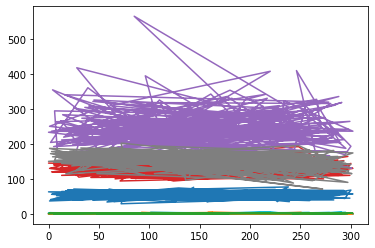

In [232]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks 
plt.plot(X_train)

In [233]:
npX_train=X_train.to_numpy()
from scipy.signal import argrelextrema
c_max_index = argrelextrema(npX_train, np.greater)

In [234]:
print(npX_train[c_max_index[0]])#peak points

[[58.  0.  0. ...  1.  0.  2.]
 [58.  0.  0. ...  1.  0.  2.]
 [58.  0.  0. ...  1.  0.  2.]
 ...
 [52.  1.  3. ...  1.  0.  3.]
 [66.  0.  3. ...  0.  0.  2.]
 [66.  0.  3. ...  0.  0.  2.]]


ValueError: x and y must be the same size

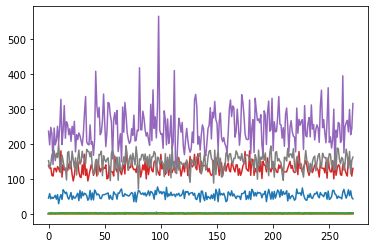

In [235]:
plt.plot(npX_train)
plt.scatter(c_max_index[0],npX_train[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [237]:
np.random.seed(42)
noise = np.random.randint(low=0.0, high=100, size=X_train.shape)
print(noise)
new_X_train_spike = X_train + noise
print(new_X_train_spike)

[[51 92 14 ... 87 99 23]
 [ 2 21 52 ... 20 32 75]
 [57 21 88 ... 14 61 61]
 ...
 [29 11 34 ... 19 66 43]
 [32 72 60 ... 64  7 44]
 [86 46 39 ... 25 51 92]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   96   92  14       209   296   20       82      238     75     74.2   
155   60   21  52       131   284   29       38      132     63     59.6   
251  100   22  88       180   337   59       41      234     60     79.1   
171   94   62  51       164   292    2       51      174     20     73.0   
53   132   59  15       116   230   52        2      258     91     59.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   98    9  66       192   285   89       13      205     52     98.1   
83    92   68  70       243   305    2       86      218     54     16.2   
17    95   11  37       160   289   49       85      134     68     49.6   
230   79   73  62       116   310   34       81      249     87     95.0   
98   129

In [238]:
npX_train=new_X_train_spike.to_numpy()
from scipy.signal import argrelextrema
c_max_index = argrelextrema(npX_train, np.greater)

In [239]:
print(npX_train[c_max_index[0]])#peak points

[[ 60.  21.  52. ...  21.  32.  77.]
 [100.  22.  88. ...  15.  65.  64.]
 [100.  22.  88. ...  15.  65.  64.]
 ...
 [ 79.  73.  62. ...  66.   7.  46.]
 [ 79.  73.  62. ...  66.   7.  46.]
 [ 79.  73.  62. ...  66.   7.  46.]]


ValueError: x and y must be the same size

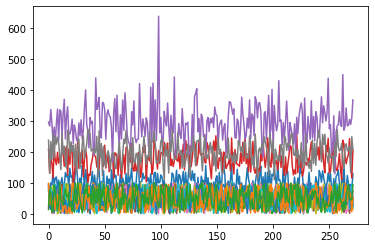

In [240]:
plt.plot(npX_train)
plt.scatter(c_max_index[0],npX_train[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [ ]:
new_X_train_spike.to_csv('new_X_train_spike.csv', index=True)

In [241]:
crit_mae(new_X_train_spike,X_test,y_train,y_test)

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5180645161290323
-0.15616403508771892


[0.5180645161290323, 0.2743032258064516, -0.15616403508771892]

In [242]:
#Calling regression function where criterion=mae with mislabelling for Spike noise 
print(crit_mae(new_X_train_spike,X_test,y_train_10mislabel,y_test))
print(crit_mae(new_X_train_spike,X_test,y_train_15mislabel,y_test))
print(crit_mae(new_X_train_spike,X_test,y_train_20mislabel,y_test))
print(crit_mae(new_X_train_spike,X_test,y_train_25mislabel,y_test))
print(crit_mae(new_X_train_spike,X_test,y_train_30mislabel,y_test))
print(crit_mae(new_X_train_spike,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5241935483870968
-0.21513201754385913
[0.5241935483870968, 0.28829354838709675, -0.21513201754385913]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.52
-0.1583666666666661
[0.52, 0.27482580645161286, -0.1583666666666661]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4932258064516129
-0.02953991228070163
[0.4932258064516129, 0.2442612903225807, -0.02953991228070163]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5164516129032257
-0.1707530701754385
[0.5164516129032257, 0.2777645161290323, -0.1707530701754385]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5019354838709676
-0.067406140350877
[0.5019354838709676, 0.25324516129032265, -0.067406140350877]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.4735483870967741
-0.007771929824560875
[0.4735483870967741, 0.23909677419354836, -0.007771929824560875]


In [243]:
#Calling regression function where criterion=mse with mislabelling for Spike noise
print(crit_mse(new_X_train_spike,X_test,y_train,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_10mislabel,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_15mislabel,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_20mislabel,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_25mislabel,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_30mislabel,y_test))
print(crit_mse(new_X_train_spike,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.48451612903225805
-0.00034824561403468124
[0.48451612903225805, 0.23733548387096776, -0.00034824561403468124]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4938709677419355
-0.03206885964912254
[0.4938709677419355, 0.24486129032258064, -0.03206885964912254]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4732258064516129
-0.01803728070175392
[0.4732258064516129, 0.2415322580645161, -0.01803728070175392]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.47451612903225804
-0.050940789473683745
[0.47451612903225804, 0.24933870967741936, -0.050940789473683745]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4732258064516129
-0.03076359649122784
[0.4732258064516129, 0.2445516129032258, -0.03076359649122784]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4767741935483871
0.029428070175438914
[0.4767741935483871, 0.23027096774193548, 0.029428070175438914]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.4741935483870968
-0.07192017543859608
[0.4741935483870968, 0.25431612903225803, -0.07192017543859608]


In [ ]:
#########################Salt & Pepper Noise################################

In [244]:
maxValues = X_train.max()
 
print(maxValues)
minValues = X_train.min()
 
print(minValues)

age          77.0
sex           1.0
cp            3.0
trestbps    192.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       5.6
slope         2.0
ca            4.0
thal          3.0
dtype: float64
age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
dtype: float64


In [245]:
####Gaussian Noise Level 1 mu=0  sigma=0.1 ####
np.random.seed(42)
noise = np.random.normal(0, 1, X_train.shape)
print(noise)

[[ 0.49671415 -0.1382643   0.64768854 ... -0.46341769 -0.46572975
   0.24196227]
 [-1.91328024 -1.72491783 -0.56228753 ... -1.42474819 -0.54438272
   0.11092259]
 [-1.15099358  0.37569802 -0.60063869 ...  0.2088636  -1.95967012
  -1.32818605]
 ...
 [-0.04808851 -0.18315047 -0.35667313 ... -0.06100397  0.50024047
  -0.53360031]
 [ 1.2208213  -0.87677378  1.71204028 ...  0.50274481 -2.49327082
  -0.9656648 ]
 [ 1.62916636 -0.58178203 -1.17387996 ... -1.2390527   2.0958435
   1.59444239]]


In [246]:
noise[noise < 0.5] = 0
noise[noise > 0.5] = 1
print(noise)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]]


In [247]:
X_train_saltandpepper = X_train

In [248]:
X_train_saltandpepper=X_train_saltandpepper.clip(X_train_saltandpepper.max(),axis=1)

In [249]:
X_train_saltandpepper = noise + X_train_saltandpepper
print(X_train_saltandpepper)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
107  77.0  1.0  4.0     193.0  564.0  1.0      3.0    203.0    1.0      6.6   
155  77.0  1.0  3.0     192.0  564.0  1.0      2.0    203.0    1.0      5.6   
251  77.0  1.0  3.0     192.0  564.0  2.0      2.0    202.0    2.0      5.6   
171  77.0  2.0  3.0     192.0  564.0  1.0      2.0    202.0    2.0      5.6   
53   77.0  2.0  4.0     193.0  564.0  1.0      2.0    203.0    1.0      5.6   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
106  77.0  1.0  3.0     192.0  564.0  2.0      2.0    203.0    2.0      5.6   
83   77.0  1.0  4.0     193.0  564.0  1.0      2.0    202.0    1.0      5.6   
17   77.0  1.0  3.0     193.0  564.0  1.0      2.0    202.0    1.0      5.6   
230  78.0  1.0  4.0     192.0  564.0  1.0      2.0    202.0    2.0      5.6   
98   78.0  1.0  3.0     192.0  565.0  1.0      2.0    203.0    2.0      5.6   

     slope   ca  thal  
107    2.0  4.0   3.0  
155

In [250]:
X_train_saltandpepper.replace(X_train_saltandpepper.max(),X_train.min())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,77.0,1.0,0.0,94.0,564.0,1.0,0.0,71.0,1.0,0.0,2.0,4.0,3.0
155,77.0,1.0,3.0,192.0,564.0,1.0,2.0,71.0,1.0,5.6,2.0,4.0,3.0
251,77.0,1.0,3.0,192.0,564.0,0.0,2.0,202.0,0.0,5.6,2.0,4.0,3.0
171,77.0,0.0,3.0,192.0,564.0,1.0,2.0,202.0,0.0,5.6,2.0,4.0,3.0
53,77.0,0.0,0.0,94.0,564.0,1.0,2.0,71.0,1.0,5.6,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,77.0,1.0,3.0,192.0,564.0,0.0,2.0,71.0,0.0,5.6,2.0,4.0,3.0
83,77.0,1.0,0.0,94.0,564.0,1.0,2.0,202.0,1.0,5.6,0.0,0.0,0.0
17,77.0,1.0,3.0,94.0,564.0,1.0,2.0,202.0,1.0,5.6,2.0,0.0,3.0
230,29.0,1.0,0.0,192.0,564.0,1.0,2.0,202.0,0.0,5.6,0.0,4.0,3.0


In [265]:
X_train_saltandpepper.to_csv('X_train_saltandpepper.csv', index=True)

In [251]:
crit_mae(X_train_saltandpepper,X_test,y_train,y_test)

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5964516129032259
-1.426966885964911


[0.5964516129032259, 0.5758048387096772, -1.426966885964911]

In [252]:
#Calling regression function where criterion=mae with mislabelling for Salt&Pepper
print(crit_mae(X_train_saltandpepper,X_test,y_train_10mislabel,y_test))
print(crit_mae(X_train_saltandpepper,X_test,y_train_15mislabel,y_test))
print(crit_mae(X_train_saltandpepper,X_test,y_train_20mislabel,y_test))
print(crit_mae(X_train_saltandpepper,X_test,y_train_25mislabel,y_test))
print(crit_mae(X_train_saltandpepper,X_test,y_train_30mislabel,y_test))
print(crit_mae(X_train_saltandpepper,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5554838709677419
-0.5873359649122802
[0.5554838709677419, 0.3766, -0.5873359649122802]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5520967741935483
-0.4895805921052627
[0.5520967741935483, 0.3534072580645161, -0.4895805921052627]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5564516129032256
-0.6336388157894737
[0.5564516129032256, 0.38758548387096786, -0.6336388157894737]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5503225806451612
-0.558994078947368
[0.5503225806451612, 0.36987580645161294, -0.558994078947368]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.527258064516129
-0.2764283991228067
[0.527258064516129, 0.3028362903225807, -0.2764283991228067]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:394: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.5314516129032258
-0.37894594298245554
[0.5314516129032258, 0.3271588709677419, -0.37894594298245554]


In [253]:
#Calling regression function where criterion=mse with mislabelling for Salt&Pepper
print(crit_mse(X_train_saltandpepper,X_test,y_train,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_10mislabel,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_15mislabel,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_20mislabel,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_25mislabel,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_30mislabel,y_test))
print(crit_mse(X_train_saltandpepper,X_test,y_train_40mislabel,y_test))

/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5861989247311827
-1.3131430476364514
[0.5861989247311827, 0.5487998073476702, -1.3131430476364514]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5317688172043011
-0.26412127952404085
[0.5317688172043011, 0.2999163909796893, -0.26412127952404085]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5386554019457246
-0.3541005829261197
[0.5386554019457246, 0.32126423819683186, -0.3541005829261197]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5361336405529954
-0.355447755683852
[0.5361336405529954, 0.32158385878867674, -0.355447755683852]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5214861751152073
-0.21312202211630216
[0.5214861751152073, 0.2878166712201009, -0.21312202211630216]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5249639016897082
-0.2482567015330983
[0.5249639016897082, 0.2961524744532222, -0.2482567015330983]


/home/apurva/anaconda3/envs/scikitlearnoriginal/scikit-learn/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.5147626728110599
-0.16459879500586716
[0.5147626728110599, 0.27630439673396234, -0.16459879500586716]
